<a href="https://colab.research.google.com/github/suryagokul/Real-Estate-Price-Prediction/blob/main/Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import warnings

warnings.filterwarnings('ignore')

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

In [ ]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [ ]:
df[:5]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
type(df['size'][0])

str

In [ ]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [ ]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

# Data Cleaning

In [ ]:
df.drop(['area_type','availability','society','balcony'],axis=1,inplace=True)

In [ ]:
df[:4]

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00


In [ ]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df1 = df.dropna()

In [ ]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df1['BHK'] = df1['size'].apply(lambda x:x.split(' ')[0])

In [ ]:

df1[:4]

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3


In [ ]:
df1.drop('size',axis=1,inplace=True)

In [ ]:
df2 = df1.copy()

In [ ]:
df2[:4]

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3


In [ ]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)
df3 = df3[df3.total_sqft.notnull()]
df3.head(5)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [ ]:
df2.total_sqft[30]

'2100 - 2850'

In [ ]:
(2100 + 2850) /2

2475.0

In [ ]:
df3.total_sqft[30]

2475.0

# Feature Engineering

In [ ]:
df3['Price_per_Sqft'] = (df3.price*100000)/df3.total_sqft

In [ ]:
df3[:5]

,location,total_sqft,bath,price,BHK,Price_per_Sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df3.location.nunique()

1298

In [ ]:
df3.location = df3.location.apply(lambda x : x.strip())

In [ ]:
df3

,location,total_sqft,bath,price,BHK,Price_per_Sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [ ]:
locations = df3.location.value_counts(ascending=False)

locations

Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Zuzuvadi                  1
Arasanakunte              1
Cambridge  road           1
Off Bannergatta road      1
poornaprajna layout       1
Name: location, Length: 1287, dtype: int64

In [ ]:
locations.shape

(1287,)

In [ ]:
locations_less_than_10 = locations[locations<=10]

In [ ]:
locations_less_than_10

Sector 1 HSR Layout     10
Gunjur Palya            10
Basapura                10
Ganga Nagar             10
Naganathapura           10
                        ..
Zuzuvadi                 1
Arasanakunte             1
Cambridge  road          1
Off Bannergatta road     1
poornaprajna layout      1
Name: location, Length: 1047, dtype: int64

In [ ]:
locations_less_than_10.shape

(1047,)

In [ ]:
df3.location = df3.location.apply(lambda x: "Other" if x  in locations_less_than_10 else x)

In [ ]:
df3[:5]

,location,total_sqft,bath,price,BHK,Price_per_Sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df3.location.nunique()                  # Before 1298 unique locations are there but now we have only 241 locations. 

241

# Outlier REMOVAL

In [ ]:
df3.BHK = df3.BHK.astype('float')

In [ ]:
df3.shape

(13200, 6)

In [ ]:
df4 = df3[~(df3.total_sqft/df3.BHK<300)]

In [ ]:
df4.shape

(12456, 6)

In [ ]:
df4.Price_per_Sqft.describe()    # Minimum price per sqft is 267 which is said to be an outlier because in real Bengalru doesn't have this much low price.
                                                                                                                                     

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_Sqft, dtype: float64

In [ ]:
def Outlier_handling(df):
  df_new = pd.DataFrame()
  for name,subdf in df.groupby('location'):
    mu = np.mean(subdf.Price_per_Sqft)
    std = np.std(subdf.Price_per_Sqft)
    reduced_df = subdf[(subdf.Price_per_Sqft>(mu-std)) & (subdf.Price_per_Sqft<(mu+std))]          # Keep all the data falls under 1 std.
    df_new = pd.concat([df_new,reduced_df],ignore_index=True)
  return df_new

In [ ]:
df5 = Outlier_handling(df4)

df5

,location,total_sqft,bath,price,BHK,Price_per_Sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.00,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.00,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.00,2.0,11983.805668
...,...,...,...,...,...,...
10237,Yeshwanthpur,1676.0,3.0,92.13,3.0,5497.016706
10238,Yeshwanthpur,2503.0,3.0,138.00,3.0,5513.383939
10239,Yeshwanthpur,1855.0,3.0,135.00,3.0,7277.628032
10240,Yeshwanthpur,1876.0,3.0,160.00,3.0,8528.784648


In [ ]:
df5.shape

(10242, 6)

In [ ]:
bhk2 = df5[(df5.location=='Yeshwanthpur') & (df5.BHK==2)]

bhk3 = df5[(df5.location=='Yeshwanthpur') & (df5.BHK==3)]

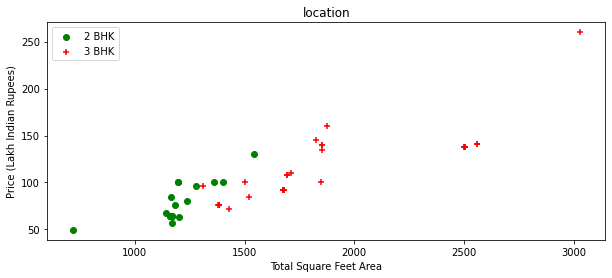

In [ ]:
plt.figure(figsize=(10,4))

plt.scatter(bhk2.total_sqft,bhk2.price,label='2 BHK',color='green')

plt.scatter(bhk3.total_sqft,bhk3.price,label='3 BHK',marker='+',color='red')

plt.xlabel("Total Square Feet Area")
plt.ylabel("Price (Lakh Indian Rupees)")
plt.title("location")

plt.legend()

In [ ]:
def remove_bhk_outliers():
  exclude_indices = np.array([])
  for lname,ldf in df5.groupby('location'):
    bhk_stats = {}
    for bname,bdf in ldf.groupby('BHK'):
      bhk_stats[bname] = {
          'mean' : np.mean(bdf.Price_per_Sqft),
          'std' : np.std(bdf.Price_per_Sqft),
          'count' : bdf.shape[0]
      }
      for bname,bdf in ldf.groupby('BHK'):
        stats = bhk_stats.get(bname-1)
        if stats and stats['count']>5:
          exclude_indices = np.append(exclude_indices, bdf[bdf.Price_per_Sqft>(stats['mean'])].index.values)
  return df5.drop(exclude_indices,axis='index')

In [ ]:
df6 = remove_bhk_outliers()

In [ ]:
df6

,location,total_sqft,bath,price,BHK,Price_per_Sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.00,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.00,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.00,2.0,11983.805668
...,...,...,...,...,...,...
10235,Yeshwanthpur,2500.0,3.0,138.00,3.0,5520.000000
10236,Yeshwanthpur,1160.0,2.0,64.08,2.0,5524.137931
10237,Yeshwanthpur,1676.0,3.0,92.13,3.0,5497.016706
10238,Yeshwanthpur,2503.0,3.0,138.00,3.0,5513.383939


In [ ]:
bhk2 = df6[(df6.location=='Yeshwanthpur') & (df6.BHK==2)]

bhk3 = df6[(df6.location=='Yeshwanthpur') & (df6.BHK==3)]

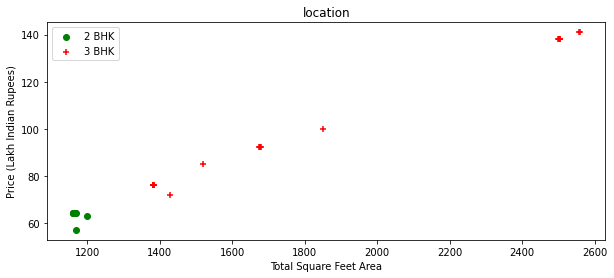

In [ ]:
plt.figure(figsize=(10,4))

plt.scatter(bhk2.total_sqft,bhk2.price,label='2 BHK',color='green')

plt.scatter(bhk3.total_sqft,bhk3.price,label='3 BHK',marker='+',color='red')

plt.xlabel("Total Square Feet Area")
plt.ylabel("Price (Lakh Indian Rupees)")
plt.title("location")

plt.legend()

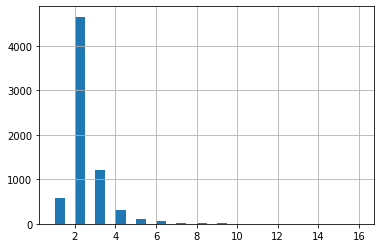

In [ ]:
df6['bath'].hist(bins=30)

In [ ]:
df7 = df6[df6.bath<df6.BHK+2]

In [ ]:
df7[:5]

,location,total_sqft,bath,price,BHK,Price_per_Sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668


In [ ]:
df7.location.nunique()

241

# Model Building

In [ ]:
dummies = pd.get_dummies(df7.location)

dummies[:5]

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,...,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df8 = pd.concat([df7,dummies.drop('Other',axis=1)],axis=1)

In [ ]:
df8[:3]

,location,total_sqft,bath,price,BHK,Price_per_Sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,...,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df8.shape

(6926, 246)

In [ ]:
df8.columns

Index(['location', 'total_sqft', 'bath', 'price', 'BHK', 'Price_per_Sqft',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=246)

In [ ]:
df9 = df8.drop('location',axis=1)

In [ ]:
df9[:5]

,total_sqft,bath,price,BHK,Price_per_Sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,...,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,15017.543860,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,11901.840491,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3.0,12533.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3.0,10833.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2.0,11983.805668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df9.drop('price',axis='columns')

In [ ]:
y = df9.price

In [ ]:
from sklearn.model_selection import KFold,cross_val_score,train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
X_train.loc[0].shape

(244,)

In [ ]:
model_tree = DecisionTreeRegressor().fit(X_train,y_train)

In [ ]:
y_pred = model_tree.predict(X_test)

In [ ]:
model_tree.score(X_test,y_test)

0.7197538362243424

In [ ]:
folds = KFold(n_splits=4,shuffle=True)

In [ ]:
cv_score = cross_val_score(model_tree,X_train,y_train,cv=folds)

cv_score

array([0.97024247, 0.97226063, 0.68856793, 0.94689667])

In [ ]:
cv_score.mean()

0.894491926045817

In [ ]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]         # Taking column index of location

    x = np.zeros(len(X.columns))

    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    if loc_index>=0:
      x[loc_index] = 1 
    print(x)
    return model_tree.predict([x])[0]

# This code actually places 1 in the given location index and for sqft,bath,bhk it places passed values in that column index.

In [ ]:
price_sarja = predict_price('Sarjapur',1000,2,2)

print(f"Price of Sarjapur having 1000 sqft with 2 bathrooms and bedrooms is {price_sarja} Lakhs")

[1000.    2.    2.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   

In [ ]:
price_Singasandra = predict_price('Singasandra',2000,2,2)

print(f"Price of Singasandra having 2000 sqft with 2 bathrooms and bedrooms is {price_Singasandra} Lakhs")

Price of Singasandra having 2000 sqft with 2 bathrooms and bedrooms is 45.0 Lakhs


In [ ]:
predict_price('1st Block Jayanagar',5000,2,2)

80.0

In [ ]:
predict_price('1st Phase JP Nagar',8000,2,2)

390.0

In [ ]:
loc_index = np.where(X.columns=='1st Phase JP Nagar')[0][0]

In [ ]:
import pickle

In [ ]:
with open('begaluru_prediction_pickle','wb') as f:
  pickle.dump(lr_model,f)

In [ ]:
import json

In [ ]:
columns = {
    'data_columns' : [x.lower() for x in X.columns]
}
with open('columns.json','w') as j:
  j.write(json.dumps(columns))